In [53]:
import pandas as pd
import pathlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

In [9]:
path = "./"

In [25]:
csvs = [i for i in os.listdir(path) if i.split(".")[-1] == "csv"]
dfs = [pd.read_csv(i) for i in csvs]
df = pd.concat(dfs)
param_cols = ["D","L","M","feed_temp","n_reactor"]
df = df.drop_duplicates(subset=param_cols)
df = df[df["TAC"] <= 1e9]
df = df[df["conversion"] > 0.8]

In [87]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
points = df[["conversion","TAC"]].to_numpy()
# points
hull = ConvexHull(points)
simp_points = [points[simplex] for simplex in hull.simplices]
np.array(simp_points).shape


(13, 2, 2)

In [83]:
hull.simplices

array([[200, 158],
       [183, 158],
       [134, 200],
       [126, 244],
       [126, 134],
       [253, 244],
       [253, 240],
       [238, 247],
       [238, 240],
       [257, 183],
       [257, 256],
       [ 71, 247],
       [ 71, 256]], dtype=int32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


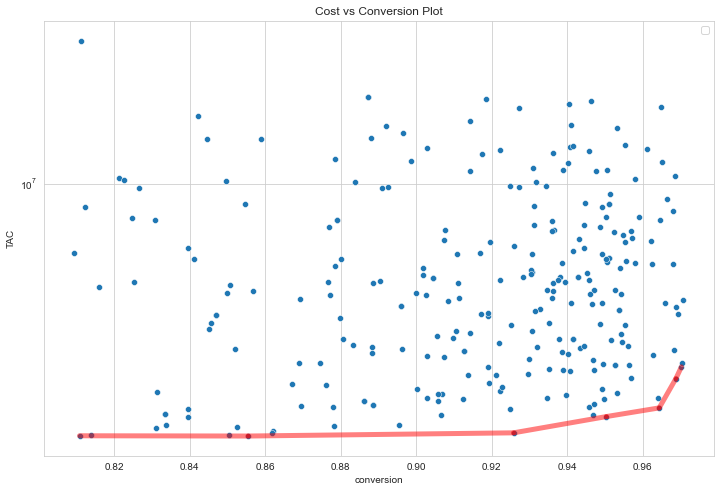

In [92]:
fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(data=df, x="conversion",y="TAC",)
plt.yscale('log')
plt.title("Cost vs Conversion Plot")
plt.Polygon(hull.simplices)
for simplex in hull.simplices[7:]:
    plt.plot(points[simplex, 0],points[simplex,1],'r-',alpha=0.5,lw=5)
plt.legend()

In [39]:
print(hull.simplices)

[[200 158]
 [183 158]
 [134 200]
 [126 244]
 [126 134]
 [253 244]
 [253 240]
 [238 247]
 [238 240]
 [257 183]
 [257 256]
 [ 71 247]
 [ 71 256]]
